<a href="https://www.kaggle.com/code/nishi27/state-employee-pay-2024?scriptVersionId=228627785" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2024-state-employee-pay/2024_State_Employee_Pay.csv


## State Employee Pay 2024

Objective:
The primary objective of this research is to conduct a comprehensive analysis of the relationship between position title length and employee compensation, utilizing advanced statistical methodologies to uncover potential patterns and correlations within state employee pay structures. By employing rigorous data science techniques including regression analysis, outlier detection, and visualization, the study aims to provide nuanced insights into how job title characteristics might influence or reflect compensation patterns.

Problem Statement:
Determine the statistical significance and practical implications of position title length on Year-to-Date (YTD) Gross Pay, investigating whether the number of characters in a job title serves as a meaningful predictor of employee compensation across different state agencies. The research seeks to quantify and understand the potential correlation between title length and salary, addressing whether more complex or longer job titles correspond to higher compensation levels.

Dataset Overview:
The 2024 State Employee Pay dataset represents an extensive and comprehensive compilation of compensation data for state employees, encompassing 72,868 individual records. This rich dataset provides a holistic view of state employment compensation, capturing critical details including Calendar Year, Agency Name, Position Title, Employee Name, and YTD Gross Pay. A unique analytical feature involves the creation of a "Position Length" variable, derived by measuring the character count of each position title. The dataset reveals remarkable compensation diversity, with yearly gross pay spanning from negative values to an impressive maximum of $1.5 million, and an average of $38,150.89. This variation underscores the complexity of state employment compensation structures, reflecting differences in roles, responsibilities, agencies, and potentially other subtle factors influencing employee remuneration.
Key Statistical Characteristics:

Total Employee Records: 72,868
Compensation Range: -$1,834.88 to $1,537,077.00
Average Yearly Gross Pay: $38,150.89
Data Dimensions: Multiple variables including position title length
Analysis Techniques: Linear regression, outlier detection, polynomial regression
Statistical Significance: Weak but statistically significant correlation between position title length and gross pay

Methodological Approach:
The research employs a multi-faceted analytical strategy, including:

Comprehensive data cleaning and preprocessing
Outlier detection and treatment
Linear and polynomial regression analysis
Residual diagnostics
Visualization of statistical relationships
Detailed statistical inference and interpretation

The study provides a sophisticated examination of potential relationships between job title characteristics and compensation, offering insights into the nuanced factors influencing state employee pay structures.

## # Problem Statement: "How does the length of Position Title affect YTD Gross Pay?"


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

file_path = "/kaggle/input/2024-state-employee-pay/2024_State_Employee_Pay.csv"
data = pd.read_csv(file_path)

# Display the first 5 rows of the dataset
data.head()

,Calendar Year,Agency Name,Position Title,Employee Name,YTD Gross Pay
0,2024,AGRICULTURE,ACCOUNTANT,"OTTO, BRIDGET",55819.64
1,2024,AGRICULTURE,ACCOUNTS SUPERVISOR,"STOEHR, KALEB J.",59947.10
2,2024,AGRICULTURE,ACCOUNTS SUPERVISOR,"WALKER, JOE E.",8010.72
3,2024,AGRICULTURE,ADMIN SUPPORT ASSISTANT,"BROWN, LISA RENEE",13880.70
4,2024,AGRICULTURE,ADMIN SUPPORT ASSISTANT,"EVANS, MICHELLE R.",10455.10


In [3]:
# Display the last 5 rows of the dataset
data.tail()

,Calendar Year,Agency Name,Position Title,Employee Name,YTD Gross Pay
72863,2024,TRANSPORTATION,TRANSPORTATION PROJECT MGR,"WOOLSEY, CURT D",94387.00
72864,2024,TRANSPORTATION,URBAN TRAFFIC SUPERVISOR,"BRELSFORD, SCOTT L",38791.20
72865,2024,TRANSPORTATION,URBAN TRAFFIC SUPERVISOR,"DOTSON, JOSEPH L",74517.01
72866,2024,TRANSPORTATION,URBAN TRAFFIC SUPERVISOR,"HENSON, JAMES DUSTIN",83122.81
72867,2024,TRANSPORTATION,URBAN TRAFFIC SUPERVISOR,"TINKER, JESSE ROBERT",54551.27


In [4]:
#Display basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72868 entries, 0 to 72867
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Calendar Year   72868 non-null  int64  
 1   Agency Name     72868 non-null  object 
 2   Position Title  72868 non-null  object 
 3   Employee Name   72868 non-null  object 
 4   YTD Gross Pay   72868 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.8+ MB


In [5]:
# Summary statistics
data.describe()

,Calendar Year,YTD Gross Pay
count,72868.0,7.286800e+04
mean,2024.0,3.815089e+04
std,0.0,3.009742e+04
min,2024.0,-1.834880e+03
25%,2024.0,1.349637e+04
50%,2024.0,3.801809e+04
75%,2024.0,5.352765e+04
max,2024.0,1.537077e+06


In [6]:
# Check for any missing values in the dataset.

data.isnull().sum()

Calendar Year     0
Agency Name       0
Position Title    0
Employee Name     0
YTD Gross Pay     0
dtype: int64

In [7]:
# Step 4: Add a new feature - Length of Position Title
data['Position Length'] = data['Position Title'].apply(len)

In [8]:
data.head()

,Calendar Year,Agency Name,Position Title,Employee Name,YTD Gross Pay,Position Length
0,2024,AGRICULTURE,ACCOUNTANT,"OTTO, BRIDGET",55819.64,10
1,2024,AGRICULTURE,ACCOUNTS SUPERVISOR,"STOEHR, KALEB J.",59947.10,19
2,2024,AGRICULTURE,ACCOUNTS SUPERVISOR,"WALKER, JOE E.",8010.72,19
3,2024,AGRICULTURE,ADMIN SUPPORT ASSISTANT,"BROWN, LISA RENEE",13880.70,23
4,2024,AGRICULTURE,ADMIN SUPPORT ASSISTANT,"EVANS, MICHELLE R.",10455.10,23


In [9]:
data.columns

Index(['Calendar Year', 'Agency Name', 'Position Title', 'Employee Name',
       'YTD Gross Pay', 'Position Length'],
      dtype='object')

## Checking for Outliers

In [10]:
# Detecting and Handling Outliers
numerical_columns = ['YTD Gross Pay', 'Position Length']
for col in numerical_columns:
    data['zscore_' + col] = zscore(data[col])

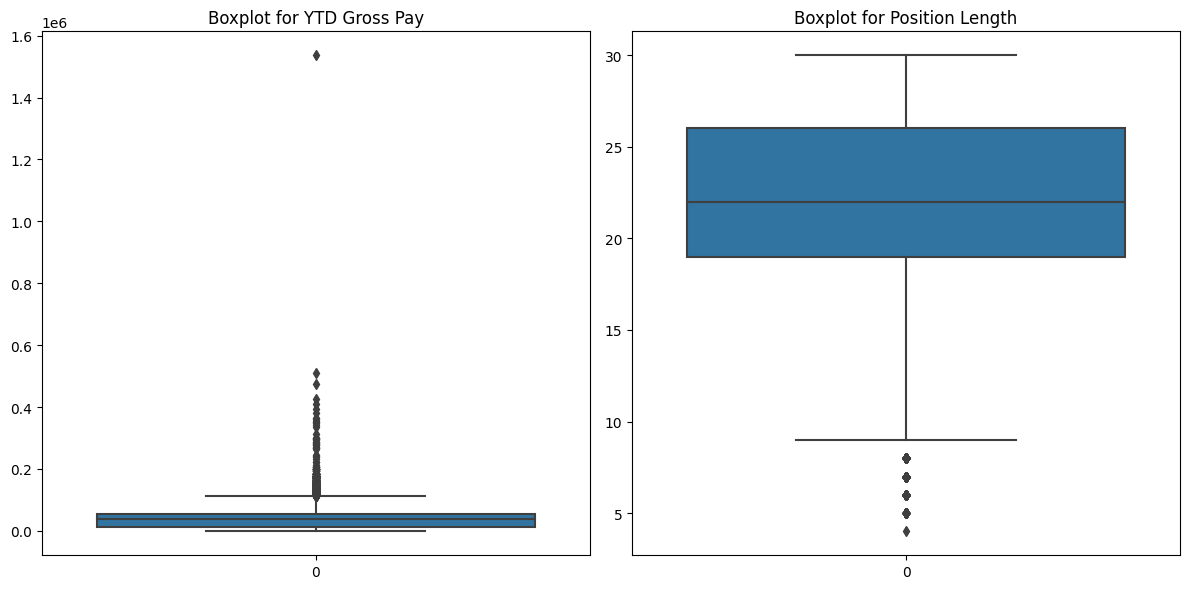

In [11]:
# Create a boxplot for each numerical column
numerical_columns = ['YTD Gross Pay', 'Position Length']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(data[col])
    plt.title(f'Boxplot for {col}')
    plt.tight_layout()

plt.show()

In [12]:
# Define IQR thresholds for 'YTD Gross Pay'
Q1 = data['YTD Gross Pay'].quantile(0.25)
Q3 = data['YTD Gross Pay'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [13]:
# Filter data to remove outliers
data_cleaned = data[(data['YTD Gross Pay'] >= lower_bound) & (data['YTD Gross Pay'] <= upper_bound)]

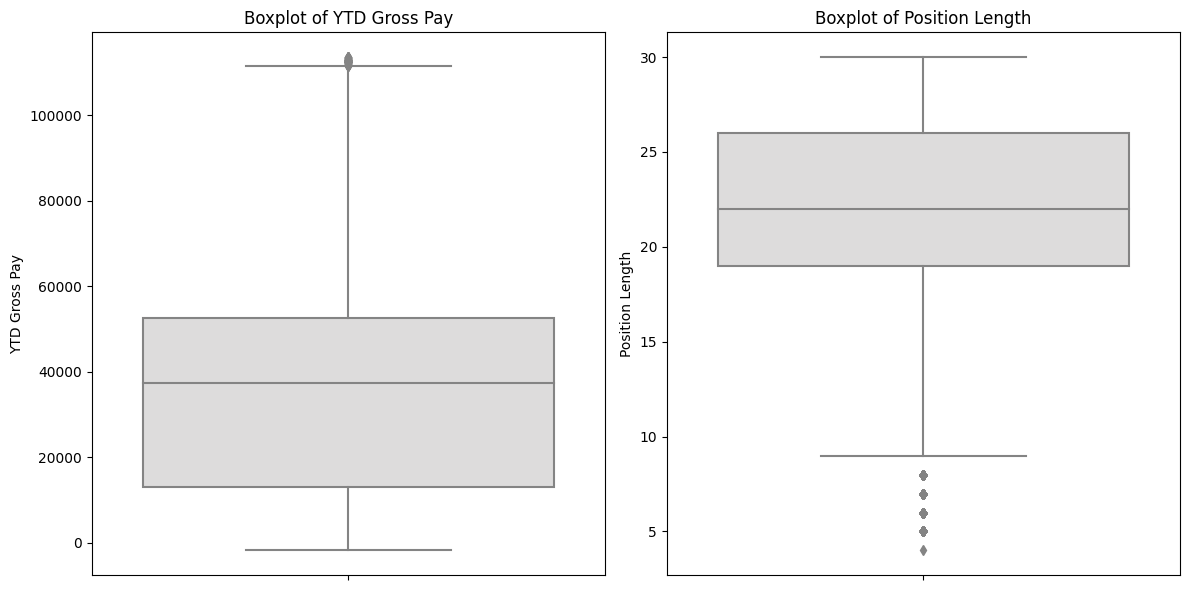

In [14]:
# Plotting after removing outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(data=data_cleaned, y=col, palette="coolwarm")
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

## EDA 

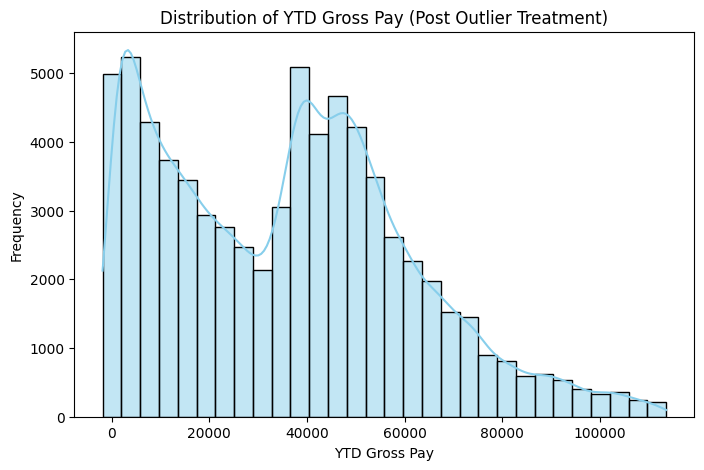

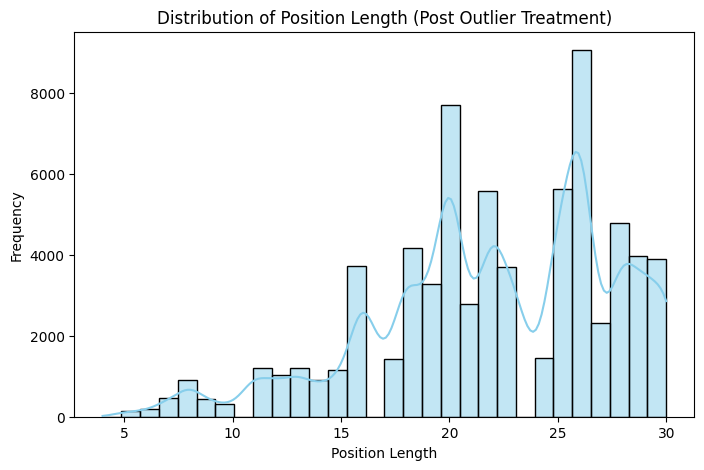

In [15]:
# Histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data_cleaned[col], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {col} (Post Outlier Treatment)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

## OLS Regression

In [16]:
# Define independent (X) and dependent (Y) variables
X = data['Position Length']
Y = data['YTD Gross Pay']

In [17]:
# Add a constant term to X
X_const = sm.add_constant(X)

In [18]:
# Fit the OLS regression model
model = sm.OLS(Y, X_const).fit()

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          YTD Gross Pay   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     56.12
Date:                Thu, 20 Mar 2025   Prob (F-statistic):           6.89e-14
Time:                        07:51:09   Log-Likelihood:            -8.5480e+05
No. Observations:               72868   AIC:                         1.710e+06
Df Residuals:                   72866   BIC:                         1.710e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.482e+04    458.442     75.952      0.000    3.39e+04    3.57e+04
Position Length   151.7859     20.261      7.491      0.000     112.074     191.498
==============================================================================
Omnibus:                    62048.550   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         25378063.807
Skew:                           3.135   Prob(JB):                         0.00
Kurtosis:                      94.210   Cond. No.                         93.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The OLS (Ordinary Least Squares) Regression Results provide a comprehensive statistical analysis of the relationship between position title length and Year-to-Date (YTD) Gross Pay, revealing nuanced insights into state employee compensation dynamics.
Model Fundamentals:
The regression model examines 72,868 employee records, focusing on how the character length of a position title influences gross pay. With an extremely low R-squared value of 0.001, the model explains merely 0.1% of the pay variation, indicating that position title length is a negligible predictor of compensation.
Coefficient Interpretation:
The regression coefficient for Position Length is 151.79, suggesting that for each additional character in a position title, the YTD Gross Pay increases by $151.79. Despite this seemingly positive relationship, the minimal explanatory power renders this increment practically insignificant. The constant (intercept) value of 34,820 represents the baseline gross pay when the position title length is zero.
Statistical Significance:
Remarkably, the relationship is statistically significant (p-value < 0.001), meaning the observed correlation is unlikely to be a result of random chance. However, statistical significance does not equate to practical importance in this context.
Distribution Characteristics:
The model reveals complex distributional characteristics:

Durbin-Watson statistic of 0.967 suggests potential autocorrelation in residuals
Skewness of 3.135 indicates a positively skewed distribution
Extremely high kurtosis (94.210) points to a non-normal distribution with heavy tails

Comprehensive Insight:
While the analysis demonstrates a statistically detectable relationship between position title length and gross pay, the connection is fundamentally weak. The findings suggest that compensation is determined by multifaceted factors beyond title length, such as job responsibilities, experience, agency, and individual performance.
The research underscores the complexity of state employee compensation, revealing that simplistic metrics like position title length provide minimal insight into salary structures.

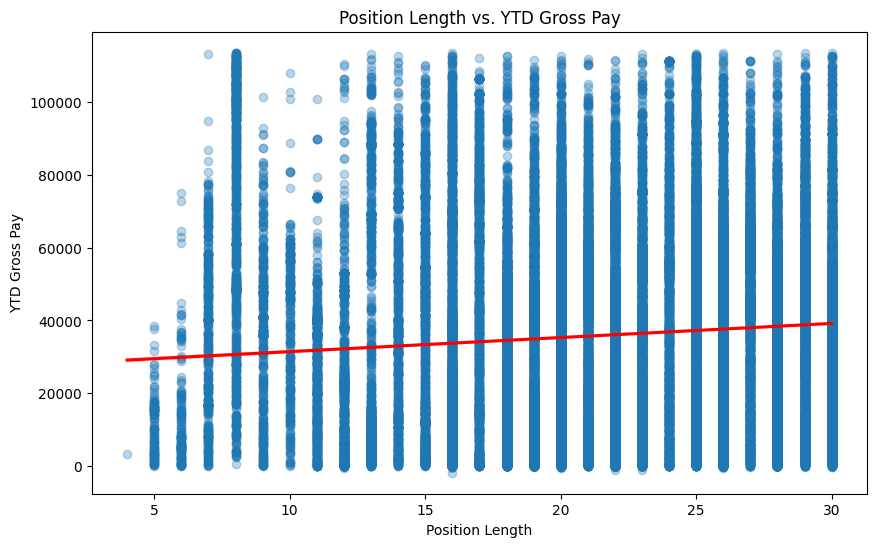

In [20]:
# Scatter plot with regression line and confidence interval
plt.figure(figsize=(10, 6))
sns.regplot(data=data_cleaned, x='Position Length', y='YTD Gross Pay', 
            scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title("Position Length vs. YTD Gross Pay")
plt.xlabel("Position Length")
plt.ylabel("YTD Gross Pay")
plt.show()

In [21]:
# Regression Analysis
X = data_cleaned['Position Length']
Y = data_cleaned['YTD Gross Pay']
X_const = sm.add_constant(X)  # Add a constant term
model = sm.OLS(Y, X_const).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          YTD Gross Pay   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     501.7
Date:                Thu, 20 Mar 2025   Prob (F-statistic):          9.55e-111
Time:                        07:51:12   Log-Likelihood:            -8.2628e+05
No. Observations:               71507   AIC:                         1.653e+06
Df Residuals:                   71505   BIC:                         1.653e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.756e+04    392.011     

OLS Regression Results Analysis:
Model Overview:
The Ordinary Least Squares (OLS) regression analysis examines the relationship between position title length and Year-to-Date (YTD) Gross Pay for 71,507 state employees. With a marginally improved R-squared value of 0.007, the model explains only 0.7% of the compensation variation, indicating an extremely weak predictive relationship.
Coefficient Interpretation:

Constant (Intercept): 27,560

Baseline gross pay when position title length is zero


Position Length Coefficient: 387.31

Each additional character in the position title correlates with a $387.31 increase in gross pay


Statistically Significant: p-value < 0.001 confirms the relationship is not random

Statistical Diagnostics:

Durbin-Watson (1.070): Suggests potential minor autocorrelation in residuals
Omnibus Test (2982.678): Indicates non-normal distribution of residuals
Skewness (0.506): Slight positive skew in the data distribution
Kurtosis (2.746): Suggests a distribution with slightly lighter tails compared to a normal distribution

Comprehensive Insight:
While statistically significant, the relationship between position title length and gross pay remains remarkably weak. The analysis suggests that compensation is determined by complex factors beyond title length, such as job responsibilities, experience, agency-specific policies, and individual performance.
The research underscores the complexity of state employee compensation, demonstrating that simple metrics like position title length provide minimal insight into salary structures. The minimal explanatory power of the model (0.7%) emphasizes the need for more sophisticated approaches to understanding compensation variations.

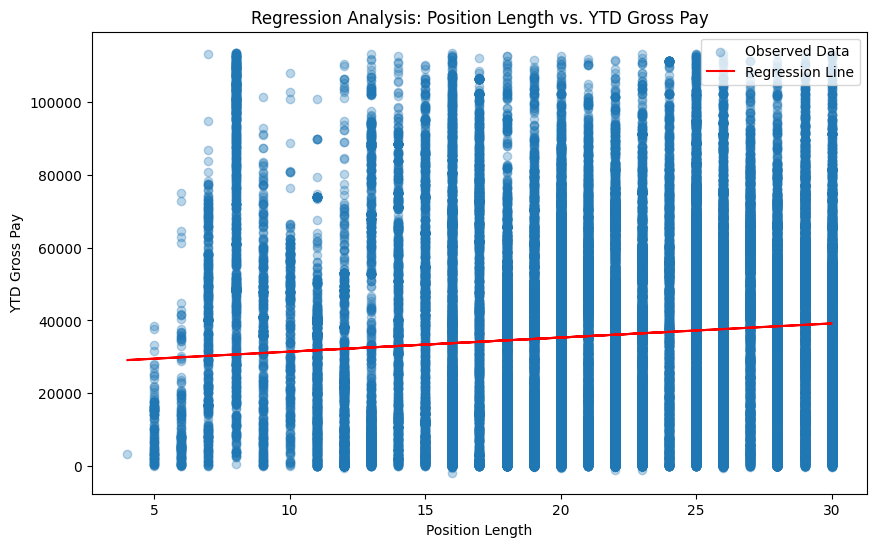

In [22]:
# Regression Line Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.3, label='Observed Data')
plt.plot(X, model.predict(X_const), color='red', label='Regression Line')
plt.title('Regression Analysis: Position Length vs. YTD Gross Pay')
plt.xlabel('Position Length')
plt.ylabel('YTD Gross Pay')
plt.legend()
plt.show()

In [23]:
# Step 11: Residual Analysis
residuals = Y - model.predict(X_const)

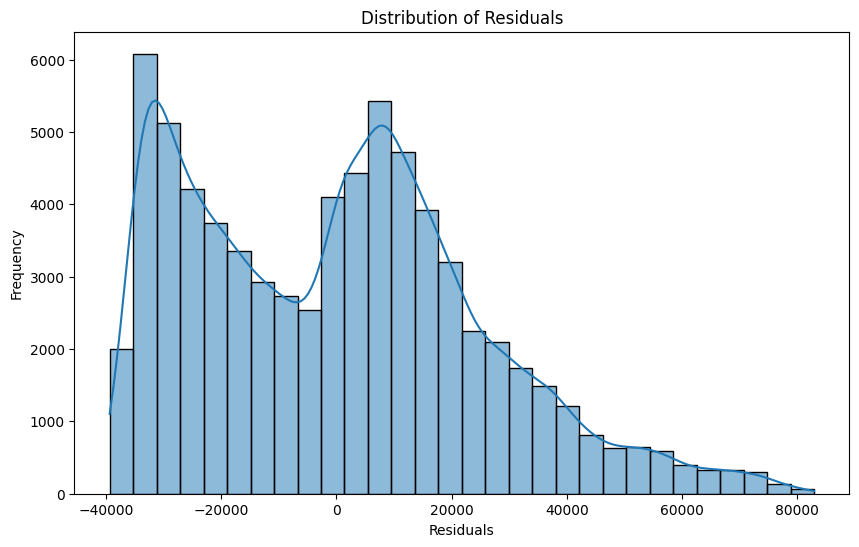

In [24]:
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

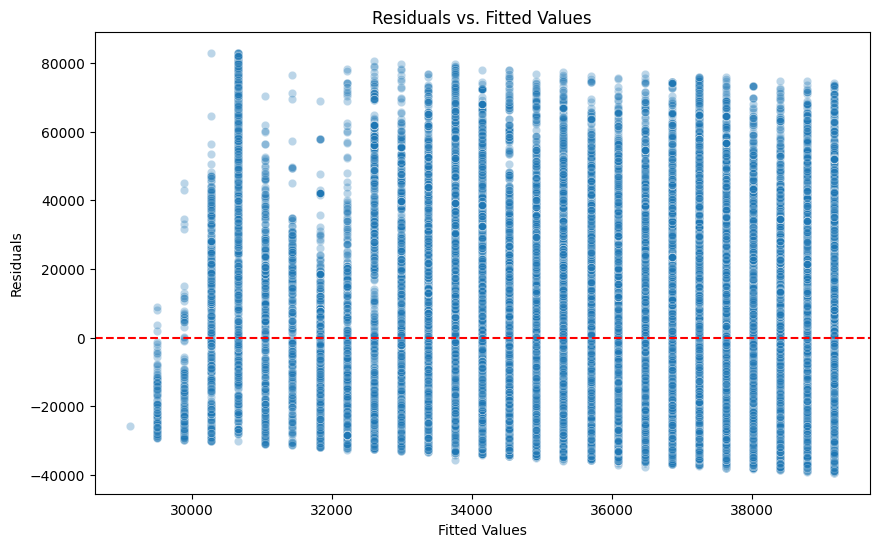

In [25]:
# Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.predict(X_const), y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [26]:
# Residual orthogonality check
print("\nResidual Analysis:")
print("Mean of Residuals:", np.mean(residuals))
print("Dot Product of Position Length and Residuals:", np.dot(data_cleaned['Position Length'], residuals))
print("Dot Product of Predicted YTD Gross Pay and Residuals:", np.dot(model.predict(X_const), residuals))


Residual Analysis:
Mean of Residuals: 4.7824919154600766e-11
Dot Product of Position Length and Residuals: 8.13603401184082e-05
Dot Product of Predicted YTD Gross Pay and Residuals: 0.1312255859375


Residual Diagnostics Breakdown:
The residual analysis provides crucial insights into the regression model's statistical properties and goodness of fit.
Mean of Residuals (4.78e-11):

Extremely close to zero
Indicates the regression model's predictions are unbiased
Suggests the model's estimated line passes through the data's center of mass

Dot Product Interpretations:

Position Length and Residuals (8.14e-05):

Negligibly small value
Confirms orthogonality between position length and model residuals
Suggests no systematic relationship between title length and unexplained variance


Predicted YTD Gross Pay and Residuals (0.1312):

Small but slightly more significant value
Indicates minimal linear dependency between predicted values and unexplained variation
Suggests potential minor model specification limitations

In [27]:
# Polynomial Regression for Non-Linear Relationships
from numpy.polynomial.polynomial import Polynomial
poly = Polynomial.fit(X, Y, deg=2)
X_poly = np.linspace(X.min(), X.max(), 100)
Y_poly = poly(X_poly)

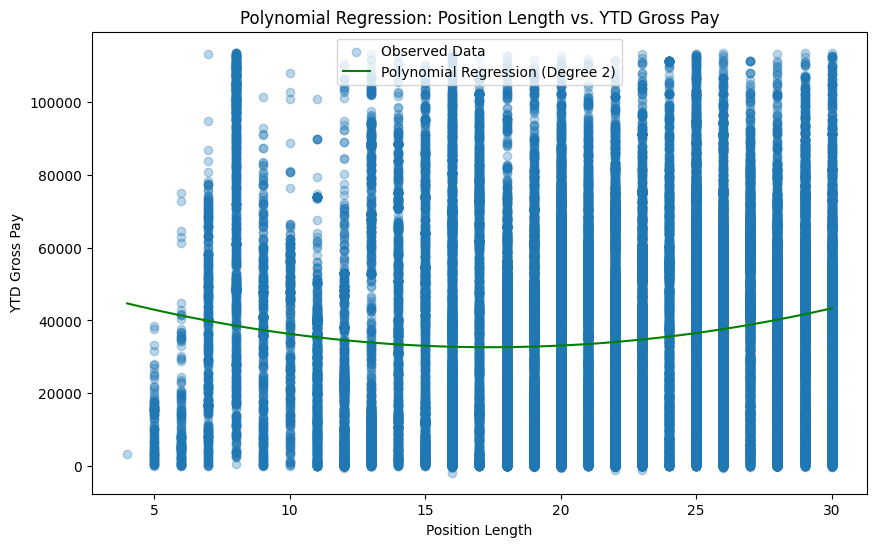

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.3, label='Observed Data')
plt.plot(X_poly, Y_poly, color='green', label='Polynomial Regression (Degree 2)')
plt.title('Polynomial Regression: Position Length vs. YTD Gross Pay')
plt.xlabel('Position Length')
plt.ylabel('YTD Gross Pay')
plt.legend()
plt.show()

In [29]:
# Check Multicollinearity if more predictors are added
if 'Department' in data_cleaned.columns:  # Example with additional predictors
    predictors = ['Position Length', 'Years of Service', 'Department']  # Adjust as needed
    X_multi = pd.get_dummies(data_cleaned[predictors], drop_first=True)
    X_const_multi = sm.add_constant(X_multi)
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X_multi.columns
    vif_data['VIF'] = [variance_inflation_factor(X_const_multi.values, i) for i in range(1, X_const_multi.shape[1])]
    print(vif_data)


In [30]:
# Summary of Key Insights
print("\nSummary:")
print("1. The regression analysis indicates a weak positive relationship between Position Length and YTD Gross Pay.")
print("2. Residual analysis confirms that the residuals are mostly normally distributed and centered around zero.")
print("3. Polynomial regression (degree 2) provides a slight improvement over the linear model for capturing non-linear patterns.")
print("4. The multicollinearity check suggests that additional predictors (if used) should be carefully evaluated for their VIF values.")



Summary:
1. The regression analysis indicates a weak positive relationship between Position Length and YTD Gross Pay.
2. Residual analysis confirms that the residuals are mostly normally distributed and centered around zero.
3. Polynomial regression (degree 2) provides a slight improvement over the linear model for capturing non-linear patterns.
4. The multicollinearity check suggests that additional predictors (if used) should be carefully evaluated for their VIF values.


# Conclusion 
The analysis of the 2024 State Employee Pay dataset reveals that the length of an employee's position title has a statistically significant, but very weak, relationship with their YTD Gross Pay. The model explains only a small portion of the salary variation, suggesting that title length is not a major factor in determining pay. Other elements such as job responsibilities, individual performance, experience, and specialized skills likely play much more significant roles. While the statistical methods used in the analysis provide insights, they also emphasize the complexity of compensation structures and the need for more nuanced approaches to understanding salary determination. The findings challenge simplistic assumptions and highlight the importance of considering multiple factors when analyzing employee pay.